# Pymacueticals

In [132]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [133]:
# name and read files

file1 = os.path.join('raw_data', 'clinicaltrial_data.csv')
file2 = os.path.join('raw_data', 'mouse_drug_data.csv')

trial_data = pd.read_csv(file1)
mouse_data = pd.read_csv(file2)

merged_df = trial_data.merge(mouse_data, on = 'Mouse ID')

In [134]:
# Mouse ID g989 is listed with two different drugs but all other records are exact duplicates
# all of those records were excluded
merged_df = merged_df[merged_df['Mouse ID'] != 'g989']

In [135]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [188]:
#group by treatment
avg_volume = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume_sem = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])


In [189]:
volume_sem = volume_sem.unstack(level=0)
volume_sem.columns = volume_sem.columns.get_level_values(1)
volume_sem = volume_sem.loc[:, ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
volume_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [190]:
avg_volume = avg_volume.unstack(level = 0)
avg_volume.columns = avg_volume.columns.get_level_values(1)
avg_volume = avg_volume.loc[:, ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
avg_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


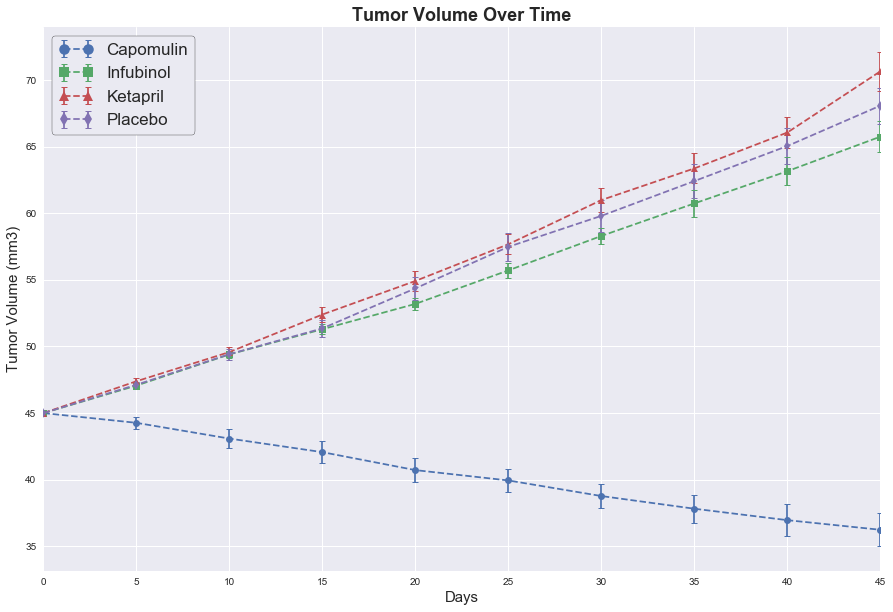

In [241]:
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})

plt.xlim(0,45)

markers = ['o', 's', '^', 'd']
xval = avg_volume.index

count = 0

for c in avg_volume.columns:
    plt.errorbar(xval, avg_volume[c], volume_sem[c], linestyle = '--', marker =  markers[count], capthick = 1, capsize = 3)
    count += 1

lg = plt.legend(numpoints = 2, frameon = True, markerscale = 1.5, edgecolor = 'black', fontsize = '17', framealpha = 1)
plt.show()

In [215]:
avg_volume.columns

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')